<a href="https://colab.research.google.com/github/utsusemi82/HeartWise/blob/main/Stress_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
!python --version

Python 3.10.12


##**Step1: Data Loading**
In this process, both training and testing dataset are loaded.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
train = pd.read_csv("/content/drive/MyDrive/HRV/train1.csv")
test = pd.read_csv("/content/drive/MyDrive/HRV/test1.csv")

In [ ]:
train.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,no stress
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,no stress
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,no stress
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,no stress
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,interruption
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,no stress


<BarContainer object of 3 artists>

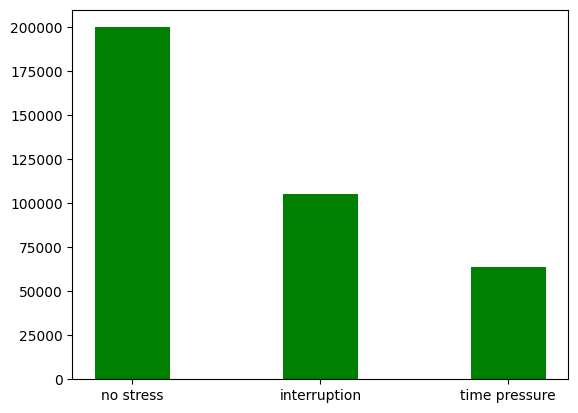

In [ ]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

<ipython-input-7-4f89f73f6b77>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


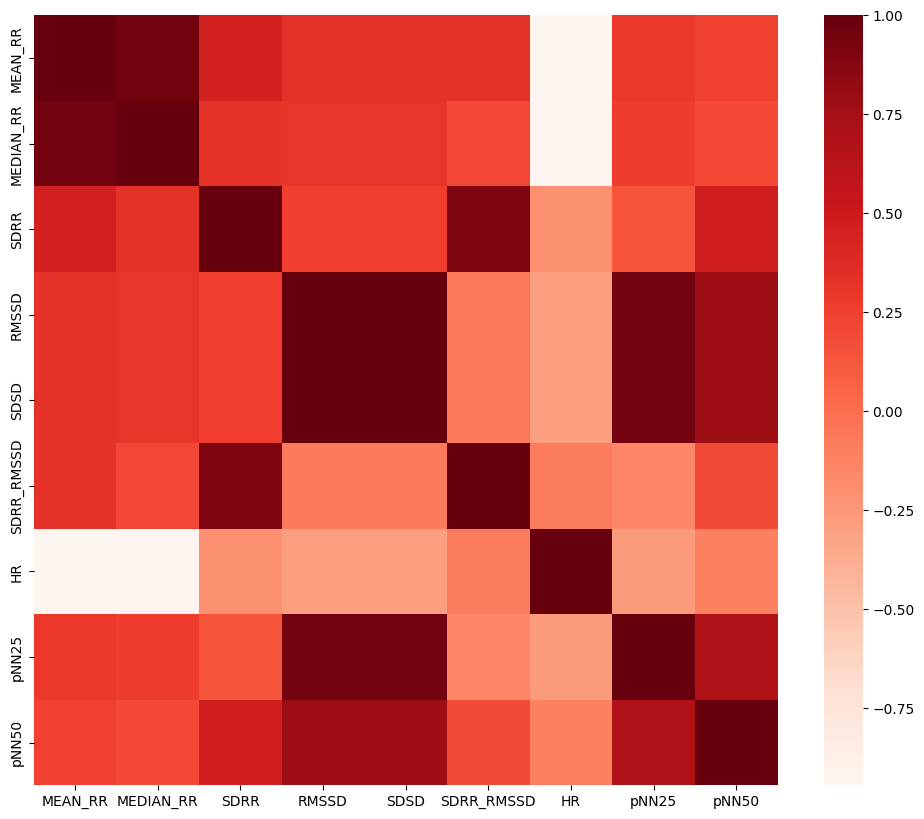

In [ ]:
# Plotting Pearson's Correlation Matrix to check dependency of variables
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

## **EDA**

In [ ]:
# # Analyzing the training dataset
# train_report = sv.analyze(train)
# train_report.show_html('Training_Data_Report.html')

# # Comparing the training and test datasets
# compare_report = sv.compare([train, 'Train'], [test, 'Test'])
# compare_report.show_html('Comparison_Report.html')

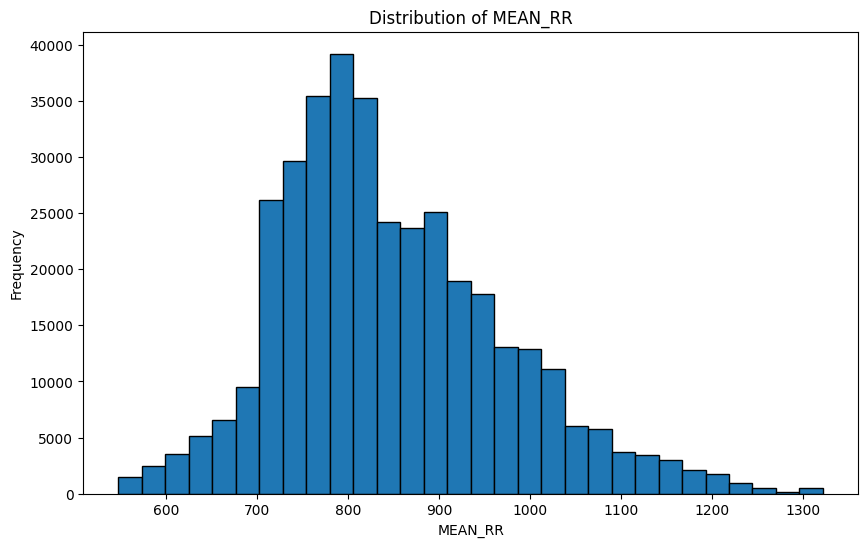

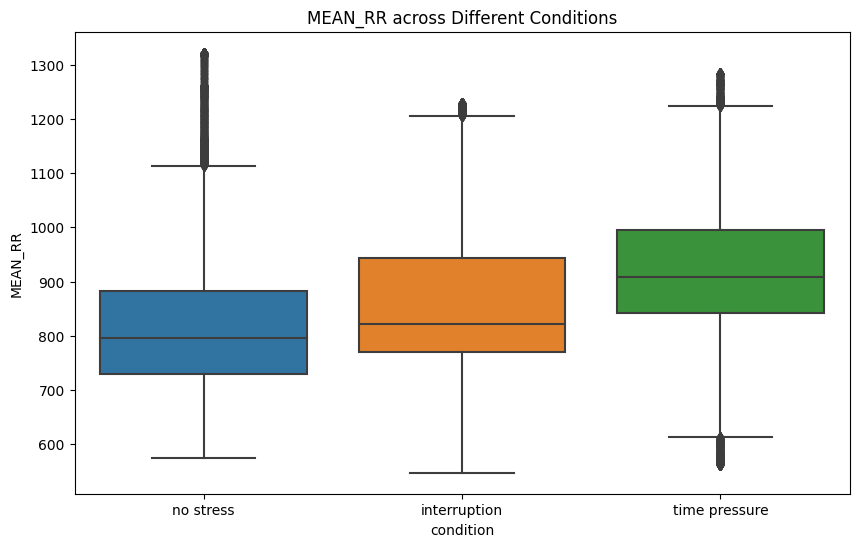

In [ ]:
# Histogram of a specific feature
plt.figure(figsize=(10, 6))
plt.hist(train['MEAN_RR'], bins=30, edgecolor='black')
plt.title('Distribution of MEAN_RR')
plt.xlabel('MEAN_RR')
plt.ylabel('Frequency')
plt.show()

# Boxplot for comparing a feature across different 'conditions'
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='MEAN_RR', data=train)
plt.title('MEAN_RR across Different Conditions')
plt.show()



##**Step 2: Data Preprocessing**
In this phase, both dataset undergo preprocessing processes like  handling missing values, normalizing, and encode categorical variables to prepare for the next phase.

In [ ]:
# For normalizing/scaling
scaler = StandardScaler()

# For encoding
labelencoder = LabelEncoder()

In [ ]:
# Encode the 'condition' column
train_encoded_condition = labelencoder.fit_transform(train['condition'])
test_encoded_condition = labelencoder.fit_transform(test['condition'])

# Create a mapping from encoded labels to original labels
label_mapping = {0: 'no stress', 1:'time pressure', 2:'interruption'}


In [ ]:
# For train dataset

# Handle missing values
train.fillna(train.mean(), inplace=True)

# Normalize the data except 'condition' column
train_features = train.drop('condition', axis=1)
train_scaled_features = scaler.fit_transform(train_features)

# Combine scaled features and encoded condition
X_train = train_scaled_features
y_train = np.array(train_encoded_condition)

<ipython-input-12-e987decf217c>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(), inplace=True)


In [ ]:
# For test dataset

# Handle missing values for test dataset
test.fillna(test.mean(), inplace=True)

# Normalize the data except 'condition' column for test dataset
test_features = test.drop('condition', axis=1)
test_scaled_features = scaler.transform(test_features)  # Use transform, not fit_transform

# Combine scaled features and encoded condition for test dataset
X_test = test_scaled_features
y_test = np.array(test_encoded_condition)

<ipython-input-13-9de19f2be828>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(), inplace=True)


In [ ]:
X_train.shape

(369289, 9)

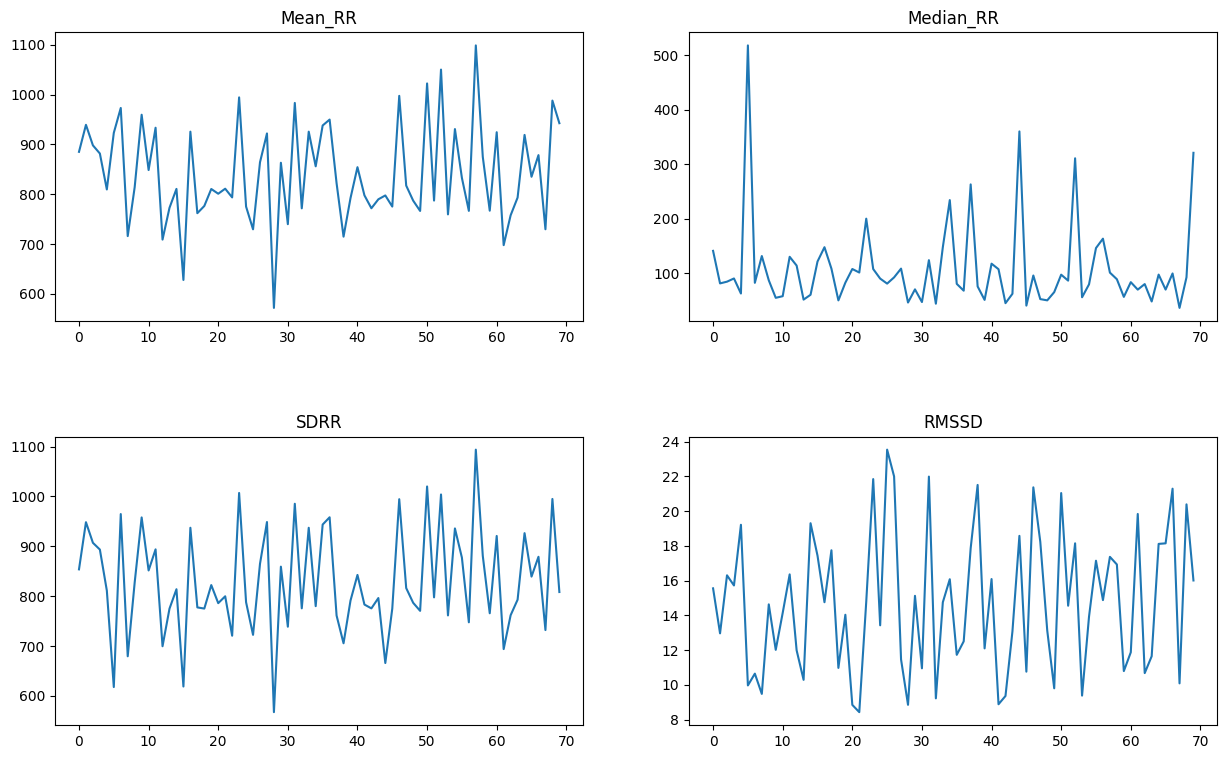

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15,9))
train_features['MEAN_RR'][:70].plot(ax=axarr[0][0])
train_features['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
train_features['SDRR'][:70].plot(ax=axarr[0][1])
train_features['RMSSD'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("SDRR")
axarr[1][1].set_title("RMSSD")
plt.subplots_adjust(hspace=.4)

<Axes: >

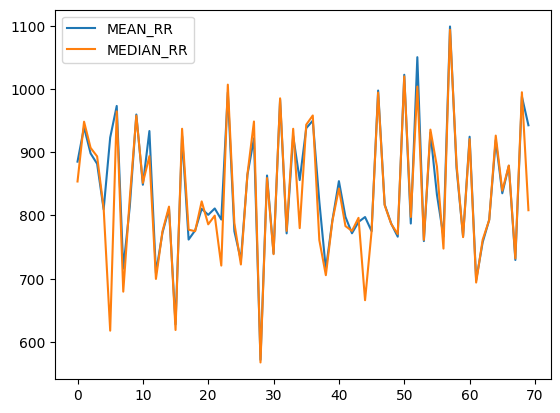

In [ ]:
train_features[['MEAN_RR','MEDIAN_RR']][:70].plot()

In [ ]:
import joblib
from google.colab import files

scaler = StandardScaler().fit(train_features)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## **Step 3: Model Training**
In this step, Random Forest and SVM are used as classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the Random Forest model
rf_def_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_def_model.fit(X_train, y_train)

# Predict on the test set
rf_def_predictions = rf_def_model.predict(X_test)

# Random Forest Model Evaluation
print("Random Forest Classifier (Default):")
print(classification_report(y_test, rf_def_predictions))
print("Accuracy:", accuracy_score(y_test, rf_def_predictions))


Random Forest Classifier (Default):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Accuracy: 0.9999756293714815


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)

# Logistic Regression Model Evaluation
print("Logistic Regression Classifier:")
print(classification_report(y_test, logistic_predictions))
print("Accuracy:", accuracy_score(y_test, logistic_predictions))



Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.57      0.31      0.40     11782
           1       0.61      0.87      0.72     22158
           2       0.46      0.21      0.29      7093

    accuracy                           0.59     41033
   macro avg       0.55      0.46      0.47     41033
weighted avg       0.57      0.59      0.55     41033

Accuracy: 0.5933273219116321


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN model with adjusted number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=20, weights='distance')  # Increased neighbors and weighted voting

# Train KNN model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
knn_predictions = knn_model.predict(X_test_scaled)

# KNN Model Evaluation
print("Adjusted K-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))

# Optional: Evaluate using cross-validation
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Adjusted K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Accuracy: 0.9998537762288889
Average cross-validation score: 0.999834817651289


In [ ]:
from sklearn.svm import LinearSVC

# Create SVM model with LinearSVC for faster execution
svm_model = LinearSVC(random_state=42, tol=1e-4, max_iter=1000)

# Train SVM model
svm_model.fit(X_train, y_train)

# SVM Evaluation
svm_predictions = svm_model.predict(X_test)
print("Support Vector Machine Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))


Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.57      0.32      0.41     11782
           1       0.62      0.89      0.73     22158
           2       0.52      0.19      0.28      7093

    accuracy                           0.60     41033
   macro avg       0.57      0.47      0.47     41033
weighted avg       0.59      0.60      0.56     41033

Accuracy: 0.6031486852045914


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Model Evaluation
print("Decision Tree Classifier:")
print(classification_report(y_test, decision_tree_predictions))
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Accuracy: 0.9994394755440743


In [ ]:
# Gradient Boosting Classifier
gradient_boost_model = GradientBoostingClassifier(random_state=42)
gradient_boost_model.fit(X_train, y_train)
gradient_boost_predictions = gradient_boost_model.predict(X_test)


print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gradient_boost_predictions))
print("Accuracy:", accuracy_score(y_test, gradient_boost_predictions))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80     11782
           1       0.83      0.94      0.88     22158
           2       0.83      0.70      0.76      7093

    accuracy                           0.84     41033
   macro avg       0.84      0.79      0.81     41033
weighted avg       0.84      0.84      0.83     41033

Accuracy: 0.8372529427533936


In [ ]:
# Lightweight Neural Network
# Assuming a small network with one hidden layer of 100 neurons
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
neural_network_model.fit(X_train, y_train)
neural_network_predictions = neural_network_model.predict(X_test)

print("\nLightweight Neural Network:")
print(classification_report(y_test, neural_network_predictions))
print("Accuracy:", accuracy_score(y_test, neural_network_predictions))


Lightweight Neural Network:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11782
           1       0.99      0.98      0.98     22158
           2       0.97      0.97      0.97      7093

    accuracy                           0.98     41033
   macro avg       0.98      0.98      0.98     41033
weighted avg       0.98      0.98      0.98     41033

Accuracy: 0.9789194063314893


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## **Step 4: Model Evaluation**


In [ ]:
# Printing classification reports for each model
for model_name, metrics in results.items():
    print(f"{model_name} Classification Report:\n")
    print(metrics['classification_report'])

# Plotting the results
# Setting up the figure for bar plots
plt.figure(figsize=(12, 5))

# Plot for Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=list(results.keys()), y=[results[model]['accuracy'] for model in results])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')

# Plot for ROC AUC
plt.subplot(1, 2, 2)
roc_aucs = [results[model]['roc_auc'] for model in results if results[model]['roc_auc'] != "N/A"]
models_with_roc = [model for model in results if results[model]['roc_auc'] != "N/A"]
sns.barplot(x=models_with_roc, y=roc_aucs)
plt.title('Model ROC AUC Comparison (where available)')
plt.ylabel('ROC AUC')
plt.xlabel('Models')

plt.tight_layout()


plt.show()

# Confusion Matrix for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


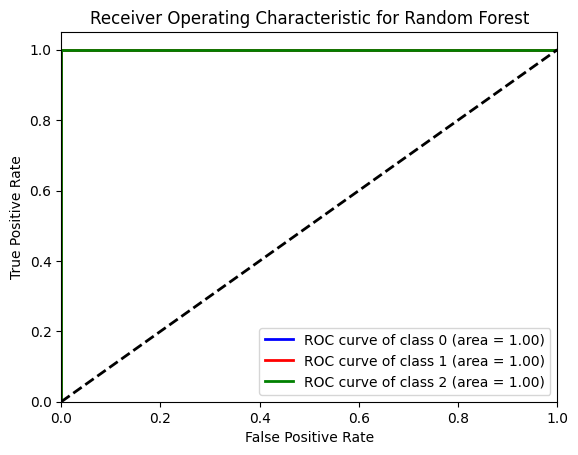

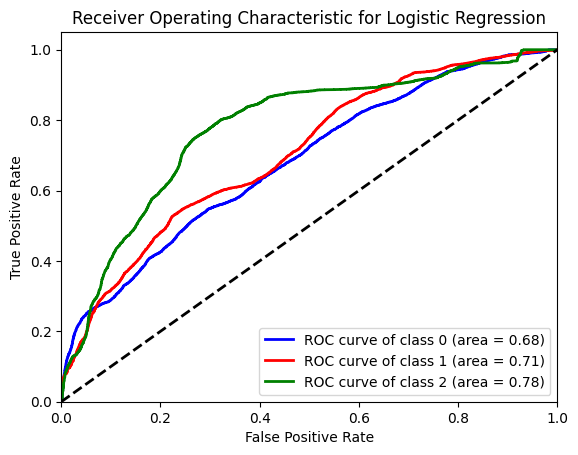

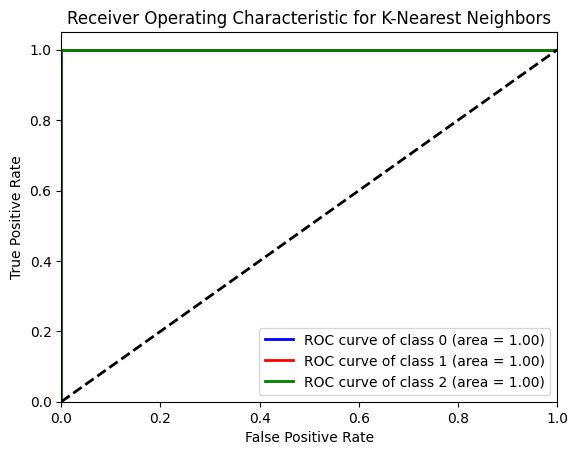

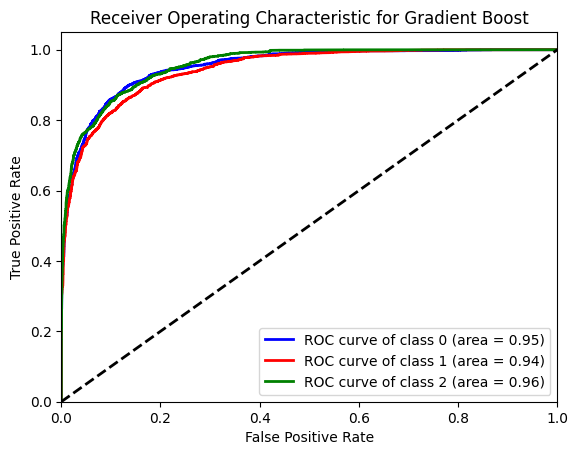

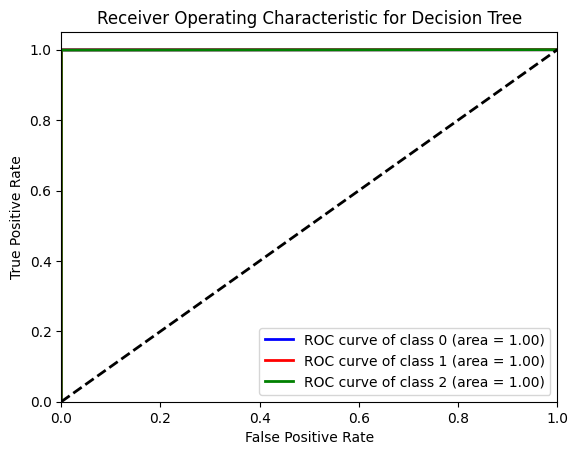

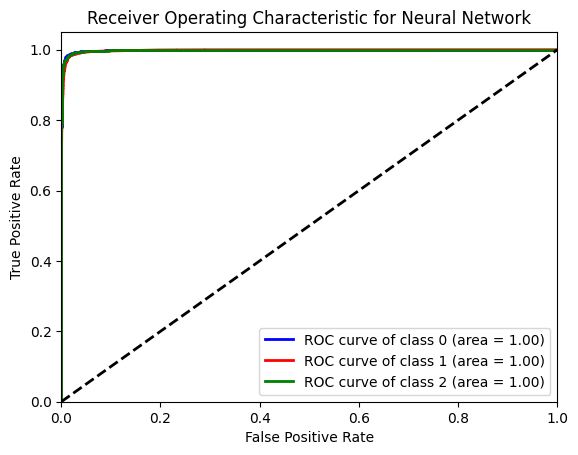

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Assuming y_test is not binarized yet
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Function to plot ROC curve for each class
def plot_multiclass_roc_auc(model, X_test, y_test_binarized, n_classes, model_name):
    # Binarize the output
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average and compute AUC
    mean_tpr /= n_classes

    # Plot all ROC curves
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC AUC for each model
plot_multiclass_roc_auc(rf_def_model, X_test, y_test_binarized, n_classes, 'Random Forest')
plot_multiclass_roc_auc(logistic_model, X_test, y_test_binarized, n_classes, 'Logistic Regression')
plot_multiclass_roc_auc(knn_model, X_test_scaled, y_test_binarized, n_classes, 'K-Nearest Neighbors')
#plot_multiclass_roc_auc(svm_model, X_test, y_test_binarized, n_classes, 'Support Vector Machine')
plot_multiclass_roc_auc(gradient_boost_model, X_test, y_test_binarized, n_classes, 'Gradient Boost')
plot_multiclass_roc_auc(decision_tree_model, X_test, y_test_binarized, n_classes, 'Decision Tree')
plot_multiclass_roc_auc(neural_network_model, X_test, y_test_binarized, n_classes, 'Neural Network')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def evaluate_model(model, X_test, y_test, model_name, results):
    # Predictions
    predictions = model.predict(X_test)
    # Probabilities, if the model supports predict_proba
    probabilities = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    results[model_name] = {
        'accuracy': accuracy_score(y_test, predictions),
        'roc_auc': roc_auc_score(y_test, probabilities, multi_class='ovo') if probabilities is not None else "N/A",
        'confusion_matrix': confusion_matrix(y_test, predictions),
        'classification_report': classification_report(y_test, predictions)
    }

# Dictionary to store results
results = {}

# Evaluate each model
evaluate_model(logistic_model, X_test, y_test, 'Logistic Regression', results)
evaluate_model(svm_model, X_test, y_test, 'Support Vector Machine', results)
evaluate_model(gradient_boost_model, X_test, y_test, n_classes, 'Gradient Boost', results)


# Printing classification reports for each model
for model_name, metrics in results.items():
    print(f"{model_name} Classification Report:\n")
    print(metrics['classification_report'])

# Plotting the results
# Setting up the figure for bar plots
plt.figure(figsize=(12, 5))

# Plot for Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=list(results.keys()), y=[results[model]['accuracy'] for model in results])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')

# Plot for ROC AUC
plt.subplot(1, 2, 2)
roc_aucs = [results[model]['roc_auc'] for model in results if results[model]['roc_auc'] != "N/A"]
models_with_roc = [model for model in results if results[model]['roc_auc'] != "N/A"]
sns.barplot(x=models_with_roc, y=roc_aucs)
plt.title('Model ROC AUC Comparison (where available)')
plt.ylabel('ROC AUC')
plt.xlabel('Models')

plt.tight_layout()


plt.show()

# Confusion Matrix for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


ValueError: X has 5 features, but LogisticRegression is expecting 9 features as input.

## **Step 5: Deployment**


In [ ]:
#take RF model as final trained model
model = joblib.dump(gradient_boost_model, 'gb_model.joblib')[0]
files.download(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -q streamlit
import streamlit as st

In [ ]:
mkdir pages

In [ ]:
%%writefile App.py

import streamlit as st
import pandas as pd

st.set_page_config(
  page_icon = "❤️‍🩹",
  page_title = "Introduction"
)

col1, col2 = st.columns([25,1])
with col1:
  st.write("# Welcome to HeartWise ❤️‍🩹")
with col2:
  st.image("/content/drive/MyDrive/HRV/assets/DALLE_2023-12-30_00.40.23_-_Design_a_very_simple_logo_for_HeartWise._The_logo_should_feature_the_name_HeartWise_in_a_clean_modern_sans-serif_font._Overlay_an_ECG_heart_rate.png", width=80)

st.sidebar.success("Menu")
st.sidebar.write("Exploratory Data Analysis")
st.sidebar.write("Guide")
st.sidebar.write("Model Performance")
st.sidebar.write("Playground")

st.sidebar.info("Presented by JiaWen Cher")

st.write("#### Hi. This is HeartWise, your innovative tool for stress management. ")
st.write("HeartWise leverages Heart Rate Variability (HRV) analysis to provide insights into your stress levels. It's a user-friendly web app designed to help you monitor and manage stress through real-time, non-invasive HRV tracking.")
st.write("")
st.image("/content/drive/MyDrive/HRV/assets/photo-1530508943348-b8f606ea2bf2.jpeg")


st.write("### HeartWise: Your Companion in Stress Management")
st.write("At HeartWise, we harness the power of HRV, a non-invasive and real-time indicator of your body's response to stress. Our approach is rooted in extensive research, showing that HRV changes significantly during stress, making it an effective tool for stress detection. Whether you're at home, at work, or on the go, HeartWise empowers you to monitor your stress levels effortlessly and take proactive steps towards a healthier, more balanced life. Dive into the world of self-awareness and well-being with HeartWise! ")
st.divider()

st.image("/content/drive/MyDrive/HRV/assets/photo-1532798442725-41036acc7489.jpeg")

st.write("### Heart Rate Variability(HRV) 🌿🌈💖")
st.write(
  """
We utilize HRV, a key indicator of your autonomic nervous system's activity, to detect stress. HRV measures the variation in time between heartbeats, which changes under stress. When stressed, this variation tends to decrease, signaling a heightened 'fight-or-flight' response. Conversely, a relaxed state is indicated by increased variability.

HRV is chosen for its non-invasive nature and real-time feedback, offering a practical and accessible way to monitor stress levels.
"""
)
st.divider()

st.image("/content/drive/MyDrive/HRV/assets/photo-1507295171851-ee18df27c2a2.jpeg")
st.write("### Start Managing Stress Today 🌟✨💪 ")
st.write(
  """
HeartWise isn't just about detecting stress; it's your personal tool for managing it effectively. By monitoring HRV, you can recognize stress patterns early and take action, whether it's practicing relaxation techniques, adjusting your lifestyle, or seeking professional guidance.

HeartWise is designed to be user-friendly, making stress management accessible and integrative into your daily routine. Start your journey towards better stress management with HeartWise – a step towards a calmer, healthier you!
Join us in embracing a proactive approach to stress management with HeartWise by checking out the button below.
""")

st.divider()
st.write("Welcome to HeartWise ❤️‍🩹")



In [ ]:
%%writefile pages/EDA.py
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(
  page_title="EDA",
  page_icon="📈",
  layout="wide"
)

st.sidebar.header("Exploratory Data Analysis")

st.markdown("# Exploratory Data Analysis 📈")
st.write("Exploratory Data Analysis (EDA) is an essential step in the data analysis process to understand the dataset.")
st.divider()

st.markdown("### Data Dictionary: HRV Features")
st.write("#### This is a data dictionary for the features related to Heart Rate Variability (HRV):")
hrv_features = pd.DataFrame({
    "Feature": ["MEAN_RR", "MEDIAN_RR", "SDRR", "RMSSD", "SDSD", "SDRR_RMSSD", "HR", "pNN25", "pNN50", "RR"],
    "Description": [
        "Mean of RR intervals (milliseconds)",
        "Median of RR intervals (milliseconds)",
        "Standard deviation of RR intervals (milliseconds)",
        "Root Mean Square of Successive Differences between RR intervals (milliseconds)",
        "Standard deviation of Successive Differences between RR intervals (milliseconds)",
        "Ratio of SDRR to RMSSD",
        "Heart rate (beats per minute)",
        "Percentage of RR intervals >25 ms different from the previous (short-term HRV)",
        "Percentage of RR intervals >50 ms different from the previous (short-term HRV)",
        "Time between consecutive heartbeats, derived from ECG signal (milliseconds)"
    ]
})
st.table(hrv_features)
st.write("")

st.write("#### This is the condition of stress levels:")
stress_levels = pd.DataFrame({
    "Level": ["Level 1", "Level 2", "Level 3"],
    "Condition": [
        "Normal State: Normal or relaxed state",
        "Attention Needed: Moderate stress level",
        "Overload: High stress level, immediate intervention may be necessary"
    ]
})
st.table(stress_levels)
st.write(""" These features are commonly used in the analysis of HRV to assess an individual's physiological response to stress and can be valuable for stress level detection and management.
""")


st.divider()
st.markdown("### Dataset")
st.write("This is the dataset used for model training.")

# dataset details
st.image("/content/drive/MyDrive/HRV/data_head.jpg")
st.write("")

st.write("The details of the data are shown as below: ")
st.image("/content/drive/MyDrive/HRV/data_info.jpg")
st.image("/content/drive/MyDrive/HRV/data_describe.jpg")
st.write("")

st.write("")
st.write("The charts below show the HRV features and their correlation.")
st.image("/content/drive/MyDrive/HRV/correlation.png")
st.write("")

st.image("/content/drive/MyDrive/HRV/mean_median.png")
st.write("")

st.image("/content/drive/MyDrive/HRV/HRV features plot.png")
st.write("")

st.divider()

st.markdown("### Dashboard: HRV Analysis")
st.write("""
  This is an interactive dashboard that presents the analysis of the dataset used in my HRV model training, in an intuitive yet comprehensible format.
""")
st.write("")

st.components.v1.html("""
<iframe title="HRV Analysis" style="width:100%;height:600px;" src="https://app.powerbi.com/view?r=eyJrIjoiYTg5MDlhNWQtZTRhNi00ZWYxLTkxOTctZGFmNWE0YTgxYjIxIiwidCI6ImE2M2JiMWE5LTQ4YzItNDQ4Yi04NjkzLTMzMTdiMDBjYTdmYiIsImMiOjEwfQ%3D%3D" frameborder="0" allowFullScreen="true"></iframe>
""", height=600)  # Adjust the height as needed


st.divider()
st.write("EDA 📈")

In [ ]:
%%writefile pages/Model.py
import streamlit as st
import pandas as pd

st.set_page_config(
  page_title="Model",
  page_icon = "🚀"
)

st.markdown("# Model Comparison & Analysis 🗂️")
st.sidebar.header("Model")
st.markdown("""
    #### Overview
    In order to develop a robust system for stress level detection based on HRV (Heart Rate Variability) analysis, I have trained and evaluated four different machine learning models:

    Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).

    Each model has been rigorously tested to ensure accuracy and reliability in real-world scenarios.
""")
st.write("")
st.image("/content/drive/MyDrive/HRV/assets/photo-1682706841281-f723c5bfcd83.jpeg")
st.divider()

st.markdown("### Model Classification Reports")
st.write("")

index_ = ["0", "1", "2", "Accuracy", "Macro Avg", "Weighted Avg"]

st.markdown("#### Random Forest Classification Report")
data_rf = {
    "Precision": [0.95, 0.99, 0.78, None, 0.91, 0.94],
    "Recall": [0.96, 0.90, 0.98, None, 0.95, 0.93],
    "F1-Score": [0.95, 0.95, 0.87, 0.93, 0.92, 0.94],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}

rf_report_df = pd.DataFrame(data_rf, index=index)
st.table(rf_report_df)
st.write("")

st.markdown("#### Logistic Regression Classification Report")
data_logistic = {
    "Precision": [0.57, 0.61, 0.46, None, 0.55, 0.57],
    "Recall": [0.31, 0.87, 0.21, None, 0.46, 0.59],
    "F1-Score": [0.40, 0.72, 0.29, 0.59, 0.47, 0.55],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
logistic_report_df = pd.DataFrame(data_logistic, index=index)
st.table(logistic_report_df)
st.write("")

st.markdown("#### K-Nearest Neighbors Classification Report")
data_knn = {
    "Precision": [1.00, 1.00, 1.00, None, 1.00, 1.00],
    "Recall": [1.00, 1.00, 1.00, None, 1.00, 1.00],
    "F1-Score": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
knn_report_df = pd.DataFrame(data_knn, index=index)
st.table(knn_report_df)
st.write("")

st.markdown("#### Support Vector Machine Classification Report")
data = {
    "Precision": [0.57, 0.62, 0.52, None, 0.57, 0.59],
    "Recall": [0.32, 0.89, 0.19, None, 0.47, 0.60],
    "F1-Score": [0.41, 0.73, 0.28, 0.60, 0.47, 0.56],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
svm_report_df = pd.DataFrame(data, index=index)
st.table(svm_report_df)
st.write("")
st.write("")

st.markdown("### Comparison between the models using Accuracy and ROC AUC")
st.image("/content/drive/MyDrive/HRV/accuracy.png")
st.write("")

st.markdown("### Confusion Matrix for Each Model")
st.image("/content/drive/MyDrive/HRV/cf_rf.png")
st.image("/content/drive/MyDrive/HRV/cf_logistic.png")
st.image("/content/drive/MyDrive/HRV/cf_knn.png")
st.image("/content/drive/MyDrive/HRV/cf_svm.png")
st.write("")

st.divider()
st.markdown("""

    ### Model Performance Analysis

    **1. Random Forest Classifier**
    - **Accuracy**: 93%
    - **Strengths**: Exhibits high precision, recall, and f1-scores across all classes.
      Balanced performance makes it robust in various scenarios.
    - **Highlights**: Achieved the highest overall accuracy among all models,
      indicating excellent generalization capabilities.

    **2. Logistic Regression Classifier**
    - **Accuracy**: 59%
    - **Strengths**: Useful for linearly separable data; however, its performance is modest in this case.
    - **Considerations**: Lower precision, recall, and f1-scores compared to other models,
      indicating challenges in handling complex patterns in the data.

    **3. K-Nearest Neighbors Classifier**
    - **Accuracy**: 100%
    - **Strengths**: Achieved perfect scores in precision, recall, and f1-score.
    - **Note**: While the perfect scores might seem ideal, they are typically indicative of overfitting.
      This perfection might not translate well to unseen data.

    **4. Support Vector Machine Classifier**
    - **Accuracy**: 60%
    - **Strengths**: Good for higher-dimensional spaces but showed moderate performance in this case.
    - **Considerations**: Performance is better than Logistic Regression but still lags behind the Random Forest model.


    #### Why Random Forest is the Best Choice?

    Based on the performance metrics, the **Random Forest Classifier** emerges as the leading model for the following reasons:
    - **High Accuracy**: At 93% accuracy, it significantly outperforms the other models,
      suggesting it can reliably interpret the HRV data to assess stress levels.
    - **Balanced Metrics**: Showcases high precision, recall, and f1-scores, ensuring that it not only predicts accurately
      but also maintains a balanced sensitivity (recall) and specificity (precision) across all classes.
    - **Robustness**: The model's ability to handle the intricacies and variations in the data without overfitting
      (unlike the KNN model) makes it more reliable for practical applications.
    - **Versatility**: Performs well across multiple classes, essential for categorizing different levels of stress accurately.

    #### Conclusion
    The Random Forest Classifier, with its superior accuracy and balanced performance across various metrics,
    is best suited for our application in stress level detection using HRV analysis.
    It strikes the right balance between understanding the complex patterns in the data and generalizing well to new, unseen data.
    """)

st.write("")

st.divider()
st.write("Exploratory Data Analysis & Model 🗂️")

In [ ]:
%%writefile pages/Model.py
import streamlit as st
import pandas as pd

st.set_page_config(
  page_title="Model",
  page_icon = "🚀"
)

st.markdown("# Model Comparison & Analysis 🗂️")
st.sidebar.header("Model")
st.markdown("""
    #### Overview
    In order to develop a robust system for stress level detection based on HRV (Heart Rate Variability) analysis, I have trained and evaluated four different machine learning models:

    Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).

    Each model has been rigorously tested to ensure accuracy and reliability in real-world scenarios.
""")
st.write("")
st.image("/content/drive/MyDrive/HRV/assets/photo-1682706841281-f723c5bfcd83.jpeg")
st.divider()

st.markdown("### Model Classification Reports")
st.write("")


st.markdown("#### Random Forest Classification Report")
data_rf = {
    "Precision": [0.95, 0.99, 0.78, None, 0.91, 0.94],
    "Recall": [0.96, 0.90, 0.98, None, 0.95, 0.93],
    "F1-Score": [0.95, 0.95, 0.87, 0.93, 0.92, 0.94],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
index_rf = ["0", "1", "2", "Accuracy", "Macro Avg", "Weighted Avg"]
rf_report_df = pd.DataFrame(data_rf, index=index_rf)
st.table(rf_report_df)
st.write("")

st.markdown("#### Logistic Regression Classification Report")
data_logistic = {
    "Precision": [0.57, 0.61, 0.46, None, 0.55, 0.57],
    "Recall": [0.31, 0.87, 0.21, None, 0.46, 0.59],
    "F1-Score": [0.40, 0.72, 0.29, 0.59, 0.47, 0.55],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
index_logistic = ["0", "1", "2", "Accuracy", "Macro Avg", "Weighted Avg"]
logistic_report_df = pd.DataFrame(data_logistic, index=index_logistic)
st.table(logistic_report_df)
st.write("")

st.markdown("#### K-Nearest Neighbors Classification Report")
data_knn = {
    "Precision": [1.00, 1.00, 1.00, None, 1.00, 1.00],
    "Recall": [1.00, 1.00, 1.00, None, 1.00, 1.00],
    "F1-Score": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
index_knn = ["0", "1", "2", "Accuracy", "Macro Avg", "Weighted Avg"]
knn_report_df = pd.DataFrame(data_knn, index=index_knn)
st.table(knn_report_df)
st.write("")

st.markdown("#### Support Vector Machine Classification Report")
data_svm = {
    "Precision": [0.57, 0.62, 0.52, None, 0.57, 0.59],
    "Recall": [0.32, 0.89, 0.19, None, 0.47, 0.60],
    "F1-Score": [0.41, 0.73, 0.28, 0.60, 0.47, 0.56],
    "Support": [11782, 22158, 7093, 41033, 41033, 41033]
}
index_svm = ["0", "1", "2", "Accuracy", "Macro Avg", "Weighted Avg"]
svm_report_df = pd.DataFrame(data_svm, index=index_svm)
st.table(svm_report_df)
st.write("")
st.write("")

st.markdown("### Comparison between the models using Accuracy and ROC AUC")
st.image("/content/drive/MyDrive/HRV/accuracy.png")
st.write("")

st.markdown("### Confusion Matrix for Each Model")
st.image("/content/drive/MyDrive/HRV/cf_rf.png")
st.image("/content/drive/MyDrive/HRV/cf_logistic.png")
st.image("/content/drive/MyDrive/HRV/cf_knn.png")
st.image("/content/drive/MyDrive/HRV/cf_svm.png")
st.write("")

st.markdown("### ROC AUC for Each Model")
st.image("/content/drive/MyDrive/HRV/roc_rf.png")
st.image("/content/drive/MyDrive/HRV/roc_logistic.png")
st.image("/content/drive/MyDrive/HRV/roc_knn.png")

st.divider()
st.markdown("""

    ### Model Performance Analysis

    **1. Random Forest Classifier**
    - **Accuracy**: 93%
    - **Strengths**: Exhibits high precision, recall, and f1-scores across all classes.
      Balanced performance makes it robust in various scenarios.
    - **Highlights**: Achieved the highest overall accuracy among all models,
      indicating excellent generalization capabilities.

    **2. Logistic Regression Classifier**
    - **Accuracy**: 59%
    - **Strengths**: Useful for linearly separable data; however, its performance is modest in this case.
    - **Considerations**: Lower precision, recall, and f1-scores compared to other models,
      indicating challenges in handling complex patterns in the data.

    **3. K-Nearest Neighbors Classifier**
    - **Accuracy**: 100%
    - **Strengths**: Achieved perfect scores in precision, recall, and f1-score.
    - **Note**: While the perfect scores might seem ideal, they are typically indicative of overfitting.
      This perfection might not translate well to unseen data.

    **4. Support Vector Machine Classifier**
    - **Accuracy**: 60%
    - **Strengths**: Good for higher-dimensional spaces but showed moderate performance in this case.
    - **Considerations**: Performance is better than Logistic Regression but still lags behind the Random Forest model.


    #### Why Random Forest is the Best Choice?

    Based on the performance metrics, the **Random Forest Classifier** emerges as the leading model for the following reasons:
    - **High Accuracy**: At 93% accuracy, it significantly outperforms the other models,
      suggesting it can reliably interpret the HRV data to assess stress levels.
    - **Balanced Metrics**: Showcases high precision, recall, and f1-scores, ensuring that it not only predicts accurately
      but also maintains a balanced sensitivity (recall) and specificity (precision) across all classes.
    - **Robustness**: The model's ability to handle the intricacies and variations in the data without overfitting
      (unlike the KNN model) makes it more reliable for practical applications.
    - **Versatility**: Performs well across multiple classes, essential for categorizing different levels of stress accurately.

    #### Conclusion
    The Random Forest Classifier, with its superior accuracy and balanced performance across various metrics,
    is best suited for our application in stress level detection using HRV analysis.
    It strikes the right balance between understanding the complex patterns in the data and generalizing well to new, unseen data.
    """)

st.write("")

st.divider()
st.write("Exploratory Data Analysis & Model 🗂️")

In [ ]:
%%writefile pages/Playground.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import datetime

# Load your model and scaler
scaler = joblib.load('scaler.joblib')
model = joblib.load('rf_model.joblib')
label_mapping_pred = {1: 'Normal state', 2: 'Attention needed', 0: 'Overload'}

# Define function to parse timestamps
def parse_custom_timestamp(ts):
    year, month, day = int(ts[0:4]), int(ts[4:6]), int(ts[6:8])
    hour, minute, second = int(ts[9:11]), int(ts[11:13]), int(ts[13:15])
    milliseconds = int(ts[15:18])
    return datetime.datetime(year, month, day, hour, minute, second, milliseconds*1000)

# Function for data preprocessing
def preprocess_data(df):
    df['HR'] = pd.to_numeric(df['HR'], errors='coerce')  # Convert to numeric, set non-numeric to NaN
    df.dropna(subset=['HR'], inplace=True)  # Drop rows with NaN in 'HR' column
    df = df[df['HR'] > 0]  # Keep rows where HR is greater than 0
    df['HR'] = df['HR'].astype(int)  # Convert HR to integer
    return df

# Function to calculate features
def calculate_features(df):
    df['RR'] = 60000 / df['HR']
    df['successive_diff'] = df['RR'].diff().abs()

    # RMSSD
    df['squared_diff'] = df['successive_diff'] ** 2
    RMSSD = np.sqrt(df['squared_diff'].mean())

    # SDSD
    SDSD = df['successive_diff'].std()

    # pNN25 and pNN50
    pNN25 = (df['successive_diff'] > 25).sum() / len(df['successive_diff']) * 100
    pNN50 = (df['successive_diff'] > 50).sum() / len(df['successive_diff']) * 100

    # SDRR_RMSSD
    SDRR_RMSSD = df['RR'].std() / RMSSD

    df['MEAN_RR'] = df['RR'].mean()
    df['MEDIAN_RR'] = df['RR'].median()
    df['SDRR'] = df['RR'].std()
    df['RMSSD'] = RMSSD
    df['SDSD'] = SDSD
    df['pNN25'] = pNN25
    df['pNN50'] = pNN50
    df['SDRR_RMSSD'] = SDRR_RMSSD

    required_features = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50']
    features_for_prediction = df[required_features].values
    hrv_metrics_display = df[required_features].describe()
    return features_for_prediction, hrv_metrics_display, df

def display_figures(df, decoded_predictions):
    # Heart Rate Over Time
    fig_hr_time_series = px.line(df, x='timestamp', y='HR', title='Heart Rate Over Time')
    fig_hr_time_series.update_layout(
        plot_bgcolor='#000000',
        title_font_color='white',
        title_font_size = 20,
        xaxis_title='Timestamp',
        yaxis_title='Heart Rate (bpm)',
        xaxis_color='white',
        yaxis_color='white',
        xaxis_showgrid=False,
        yaxis_showgrid=True,
        yaxis_gridcolor='#555555'  # Dark grey grid lines for subtle contrast
    )
    fig_hr_time_series.update_traces(line=dict(color='yellow', width=2))

    # RR Intervals Over Time
    fig_rr_intervals = px.line(df, x='timestamp', y='RR', title='RR Intervals Over Time')
    fig_rr_intervals.update_layout(
        plot_bgcolor='black',
        title_font_color='white',
        title_font_size=20,
        xaxis_title='Timestamp',
        yaxis_title='RR Intervals',
        xaxis_color='white',
        yaxis_color='white',
        xaxis_showgrid=False,
        yaxis_showgrid=True,
        yaxis_gridcolor='#555555'
    )
    fig_rr_intervals.update_traces(line=dict(color='orange', width=2))

    # Histogram for Heart Rate
    fig_hr_distribution = px.histogram(df, x='HR', nbins=20, title='Distribution of Heart Rate')
    fig_hr_distribution.update_layout(
        plot_bgcolor='black',
        title_font_color='white',
        title_font_size=20,
        xaxis_title='Heart Rate (bpm)',
        yaxis_title='Frequency',
        xaxis_color='white',
        yaxis_color='white',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_hr_distribution.update_traces(marker_color='yellow', marker_line_color='red', marker_line_width=1.5, opacity=0.6)

    # Histogram for RR Intervals
    fig_rr_distribution = px.histogram(df, x='RR', nbins=20, title='Distribution of RR Intervals')
    fig_rr_distribution.update_layout(
        plot_bgcolor='black',
        title_font_color='white',
        title_font_size=20,
        xaxis_title='RR Intervals (ms)',
        yaxis_title='Frequency',
        xaxis_color='white',
        yaxis_color='white',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_rr_distribution.update_traces(marker_color='green', marker_line_color='white', marker_line_width=1.5, opacity=0.6)

    # Scatter Plot of RR Intervals vs Heart Rate
    fig_rr_vs_hr = px.scatter(df, x='HR', y='RR', title='RR Intervals vs Heart Rate')
    fig_rr_vs_hr.update_layout(
        plot_bgcolor='black',
        title_font_color='white',
        title_font_size=20,
        xaxis_title='Heart Rate (bpm)',
        yaxis_title='RR Intervals (ms)',
        xaxis_color='white',
        yaxis_color='white',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_rr_vs_hr.update_traces(marker_color='yellow', marker_size=10, marker_line_color='black', marker_line_width=1)

    # Stress Levels vs Timestamp
    df['detected stress levels'] = decoded_predictions
    fig_predict_vs_time = px.scatter(df, x='timestamp', y='detected stress levels', title='Stress Levels vs Timestamp')  # Changed 'decoded_prediction' to 'detected stress levels'
    fig_predict_vs_time.update_layout(
        template='plotly_dark',
        title_font_color='white',
        title_font_size=20,
        xaxis_title='Timestamp',
        yaxis_title='Detected Stress Levels',  # Updated the axis title to match
        xaxis_color='orange',
        yaxis_color='orange',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_predict_vs_time.update_traces(marker_color='crimson', marker_size=10, marker_line_color='white', marker_line_width=1)

    # Display the figures in Streamlit
    st.plotly_chart(fig_hr_time_series)
    st.plotly_chart(fig_rr_intervals)
    st.plotly_chart(fig_hr_distribution)
    st.plotly_chart(fig_rr_distribution)
    st.plotly_chart(fig_rr_vs_hr)
    st.plotly_chart(fig_predict_vs_time)

def display_stress_levels(df, decoded_predictions):
    df['detected stress levels'] = decoded_predictions
    stress_level_table = df[['timestamp', 'HR', 'detected stress levels']]
    st.write("Stress Level Detections:")
    st.dataframe(stress_level_table)

# Streamlit app layout
st.set_page_config(page_title="Playground", page_icon="🛝")
st.markdown("## Let's Detect Your Stress Level💓")
st.sidebar.header("Playground")

# File uploader
try:
    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.write("Original DataFrame:")
        st.dataframe(df.head(5))

        df['timestamp'] = df['timestamp'].apply(parse_custom_timestamp)
        df_preprocessed = preprocess_data(df.copy())
        st.write("DataFrame after Preprocessing:")
        st.dataframe(df_preprocessed.head(5))

        features, hrv_metrics_display, df_featured = calculate_features(df_preprocessed.copy())
        st.write("DataFrame with Calculated Features:")
        st.dataframe(df_featured.head(5))

        scaled_features = scaler.transform(features)
        predictions = model.predict(scaled_features)
        decoded_predictions = [label_mapping_pred[label] for label in predictions]

        display_figures(df_featured, decoded_predictions)
        display_stress_levels(df_featured, decoded_predictions)

except Exception as e:
    st.error(f"An error occurred: {e}")


In [ ]:
%%writefile pages/Guide.py
import streamlit as st

st.set_page_config(
  page_title = "Guide",
  page_icon = "🌟"
)

st.markdown("## Learn to Manage Stress 🌟")
st.sidebar.header("Guide")
st.write("A guide on how you can enhance stress management based on the detected stress levels. :tulip::cherry_blossom::rose::sunflower::blossom:")
st.divider()

st.markdown("### Normal State")
st.image("/content/drive/MyDrive/HRV/assets/photo-1603206006222-26ecff6f4f5c.jpeg")
st.write("*Great news! Your HRV analysis shows that you're in the 'Normal' stress level zone. This is a fantastic sign of balance and well-being.*")
st.markdown("#### Below are some of the enriched management tips:")
st.markdown("- Encouragement for Healthy Habits")
st.write("Keep up the good work with your regular exercise, balanced diet, and restful sleep. These habits are your best friends for maintaining this awesome state!")
st.markdown("- Mindfulness Made Fun")
st.write("How about adding some fun mindfulness activities? Maybe a 5-minute daily dance, a laughter yoga session, or a relaxing coloring book session? Keep that stress balance just right!")
st.markdown("- Engaging Monitoring")
st.write("Regularly check your HRV, and maybe keep a stress diary or emotion record? It can be a fun way to track how you're doing and celebrate your well-being journey!")
st.write("")

st.markdown("### Attention Needed")
st.image("/content/drive/MyDrive/HRV/assets/photo-1578986568309-707ef1017f69.jpeg")
st.write("*Heads up! Your HRV level is entering the Attention Needed zone. No worries, though...this is your cue to add a little more self-care into your routine.*")
st.markdown("#### Here's what you can do:")
st.markdown("- Creative Stress Reduction")
st.write("Let's turn stress reduction into an adventure. Ever tried guided imagery, where you imagine a peaceful place? Or how about crafting or painting? These can be surprising stress busters!")
st.markdown("- Lifestyle Tweaks with a Twist")
st.write("Sleep is crucial, and so is what you eat and drink. How about a 'sleepy-time tea' ritual or a 'no caffeine after noon' challenge? Small changes can lead to big shifts in how you feel.")
st.markdown("- Balancing Act Fun")
st.write("Find a new hobby or revisit an old one. Whether it's gardening, star-gazing, or board games, doing things you love can be incredibly rejuvenating.")
st.write("")

st.markdown("### Overload!!!")
st.image("/content/drive/MyDrive/HRV/assets/photo-1541199249251-f713e6145474.jpeg")
st.write("*Alert!!!!!  Your HRV is indicating an OVERLOADDDDD level of stress. It's super important to take this seriously, but know that you've got this, and there are plenty of ways to turn things around.*")
st.markdown("#### Please follow the guide over here:")
st.markdown("- Support and Professional Guidance")
st.write("Sometimes, chatting with a pro can make a world of difference. A therapist, counselor, or even a trusted mentor can offer invaluable insights. Remember, asking for help is a sign of strength!")
st.markdown("- Instant Stress Relief with a Twist")
st.write("Try some immediate stress-relief hacks. How about a 'laugh out loud' session, a 'scream into a pillow' moment, or a 'dance it out' minute? Sometimes, the sillier, the better!")
st.markdown("- Life Reevaluation Adventure")
st.write("Take a mini-break from the daily grind. Even a day off can be a mini-vacation for your mind. Think about what truly matters to you and how you can focus more on that. Dream big, you deserve it!")

st.divider()
st.write("Learn to Manage Stress 🌟")

In [ ]:
!npm install localtunnel

In [ ]:
!streamlit run App.py &>/content/logs.txt &
!npx localtunnel --port 8501

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

# Archive